In [2]:
!pip install spacy
!python -m spacy download en_core_web_sm
!pip install beautifulsoup4
!pip install textblob
!pip install git+https://github.com/laxmimerit/preprocess_kgptalkie.git --upgrade --force-reinstall

                                              0.0/12.8 MB ? eta -:--:--
                                              0.0/12.8 MB ? eta -:--:--
                                              0.0/12.8 MB ? eta -:--:--
                                             0.0/12.8 MB 660.6 kB/s eta 0:00:20
                                             0.0/12.8 MB 660.6 kB/s eta 0:00:20
                                             0.1/12.8 MB 581.0 kB/s eta 0:00:22
                                             0.1/12.8 MB 581.0 kB/s eta 0:00:22
                                             0.1/12.8 MB 581.0 kB/s eta 0:00:22
                                             0.1/12.8 MB 581.0 kB/s eta 0:00:22
                                             0.1/12.8 MB 581.0 kB/s eta 0:00:22
                                             0.1/12.8 MB 261.9 kB/s eta 0:00:49
                                             0.1/12.8 MB 261.9 kB/s eta 0:00:49
                                             0.1/12.8 MB 261.9 k

  Cloning https://github.com/laxmimerit/preprocess_kgptalkie.git to c:\users\nisha\appdata\local\temp\pip-req-build-fr2b5fbu
  Resolved https://github.com/laxmimerit/preprocess_kgptalkie.git to commit 96bf02872d9756f29d6cddb8aafaedcd2a39bbb4
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for preprocess-kgptalkie: filename=preprocess_kgptalkie-0.1.3-py3-none-any.whl size=7667 sha256=190a5b4de4729c068351c96bdddab9028a0ca7b9225348cf8a1e62f8f2fc7d8f
  Stored in directory: C:\Users\nisha\AppData\Local\Temp\pip-ephem-wheel-cache-7buj1sfa\wheels\74\fe\05\0d013c54ae5e4afb77c6c480378063827c84f57ea5f554e072
Successfully built preprocess-kgptalkie
  Attempting uninstall: preprocess-kgptalkie
    Found existing installation: preprocess-kgptalkie 0.1.3
    Uninstalling preprocess-kgptalkie-0.1.3:
      Successfully uninstalled preprocess-kgptalkie-0.1.3


  Running command git clone --filter=blob:none --quiet https://github.com/laxmimerit/preprocess_kgptalkie.git 'C:\Users\nisha\AppData\Local\Temp\pip-req-build-fr2b5fbu'


## Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import preprocess_kgptalkie as ps
from wordcloud import WordCloud, STOPWORDS
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## Loading Dataset

In [4]:
# disable warning
import warnings
warnings.filterwarnings('ignore')

#C:/Users/nisha/Desktop/TEFOLOGIC Final PROJECT/Dataset/twitter_sentiment (1).csv
# Change the path according to your system

df = pd.read_csv('C:/Users/nisha/Desktop/TEFOLOGIC Final PROJECT/Dataset/twitter_sentiment (1).csv', header=None, index_col=[0])


## Prepare & Concatenate Datasets

In [5]:
# Display information about the DataFrame 'df'
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 75682 entries, 2401 to 6960
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   1       75682 non-null  object
 1   2       75682 non-null  object
 2   3       74996 non-null  object
dtypes: object(3)
memory usage: 2.3+ MB


### Drop the unnecessary columns in  dataset

In [6]:
# Select columns 2 and 3 from the DataFrame 'df' and reset the index
df = df[[2, 3]].reset_index(drop=True)

# Rename the columns to 'sentiment' and 'text'
df.columns = ['sentiment', 'text']

# Display the first few rows of the modified DataFrame
df.head()


,sentiment,text
0,Positive,im getting on borderlands and i will murder yo...
1,Positive,I am coming to the borders and I will kill you...
2,Positive,im getting on borderlands and i will kill you ...
3,Positive,im coming on borderlands and i will murder you...
4,Positive,im getting on borderlands 2 and i will murder ...


In [7]:
# Check for null (missing) values in the DataFrame 'df' and sum them up
df.isnull().sum()


sentiment      0
text         686
dtype: int64

In [8]:
# Remove rows with missing (null) values from the DataFrame 'df'
df.dropna(inplace=True)


In [9]:
# Filter rows in the DataFrame 'df' where the length of the 'text' column is greater than 1
df = df[df['text'].apply(len) > 1]


In [10]:
# Count the occurrences of each unique value in the 'sentiment' column of the DataFrame 'df'
df['sentiment'].value_counts()


Negative      22530
Positive      20844
Neutral       18285
Irrelevant    12988
Name: sentiment, dtype: int64

In [11]:

# Assuming 'df' is already a DataFrame object or a compatible data structure
df = pd.DataFrame(df)


In [12]:
df.columns  

Index(['sentiment', 'text'], dtype='object')

In [13]:
df

,sentiment,text
0,Positive,im getting on borderlands and i will murder yo...
1,Positive,I am coming to the borders and I will kill you...
2,Positive,im getting on borderlands and i will kill you ...
3,Positive,im coming on borderlands and i will murder you...
4,Positive,im getting on borderlands 2 and i will murder ...
...,...,...
75677,Irrelevant,⭐️ Toronto is the arts and culture capital of ...
75678,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
75679,Positive,Today sucked so it’s time to drink wine n play...
75680,Positive,Bought a fraction of Microsoft today. Small wins.


## Feature Extraction

In [14]:
# basic feature extraction | 


df = ps.get_basic_features(df)

In [15]:
df

,sentiment,text,char_counts,word_counts,avg_wordlength,stopwords_counts,hashtag_counts,mentions_counts,digits_counts,uppercase_counts
0,Positive,im getting on borderlands and i will murder yo...,43,11,3.909091,6,0,0,1,0
1,Positive,I am coming to the borders and I will kill you...,40,12,3.333333,6,0,0,1,2
2,Positive,im getting on borderlands and i will kill you ...,41,10,4.100000,5,0,0,1,0
3,Positive,im coming on borderlands and i will murder you...,42,10,4.200000,5,0,0,1,0
4,Positive,im getting on borderlands 2 and i will murder ...,46,12,3.833333,6,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...
75677,Irrelevant,⭐️ Toronto is the arts and culture capital of ...,235,47,5.000000,20,0,0,6,1
75678,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...,202,46,4.391304,15,0,0,4,10
75679,Positive,Today sucked so it’s time to drink wine n play...,97,24,4.041667,9,0,0,1,1
75680,Positive,Bought a fraction of Microsoft today. Small wins.,42,8,5.250000,2,0,0,2,0


## Data Visualization

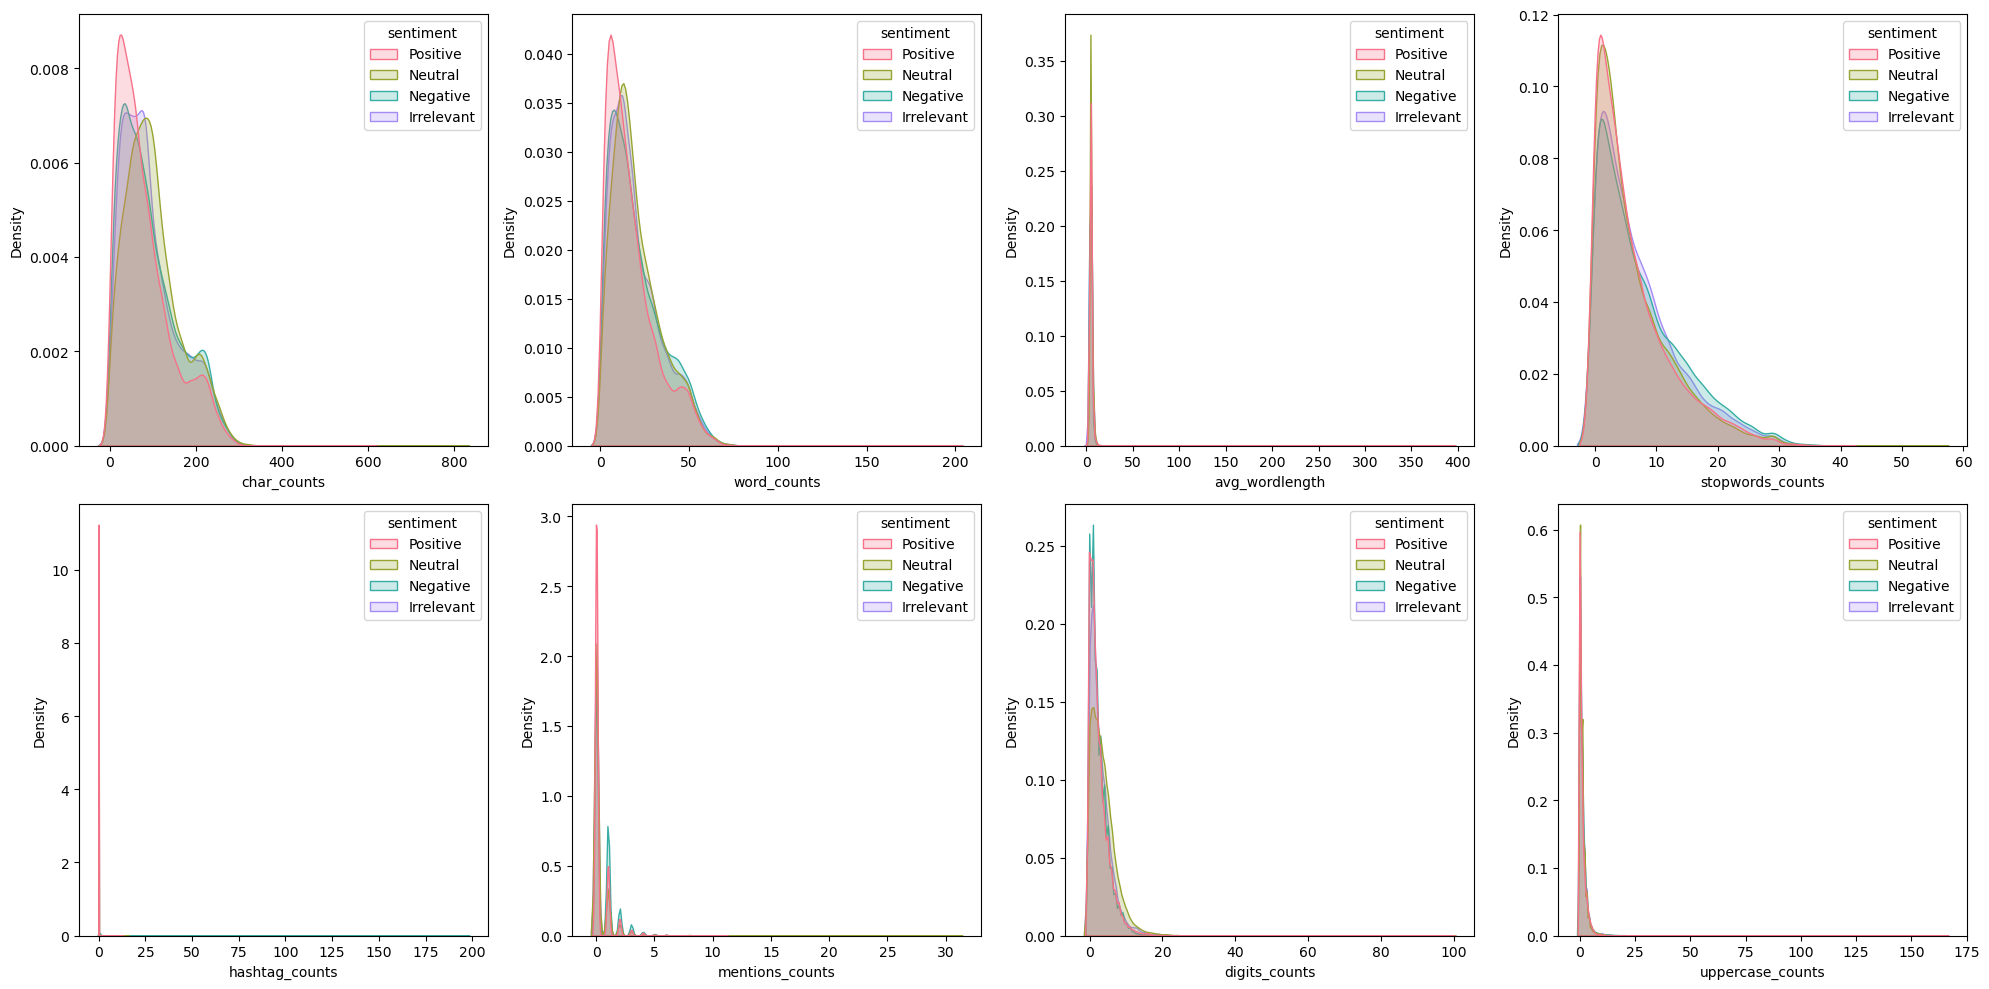

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# plot 2x4 grid KDE plot with fill for each numerical feature
plt.figure(figsize=(20,10))

num_cols = df.select_dtypes(include='number').columns

for idx, col in enumerate(num_cols):
    plt.subplot(2, 4, idx + 1)

    # Use 'sentiment' as hue to see the distribution of each numerical feature
    sns.kdeplot(data=df, x=col, hue='sentiment', fill=True, common_norm=False, palette='husl')

plt.tight_layout()
plt.show()


<Axes: ylabel='sentiment'>

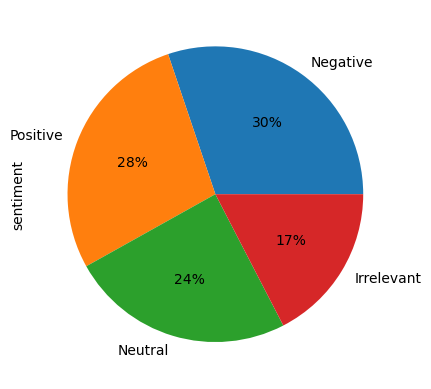

In [17]:
# Plotting a pie chart to show the distribution of sentiment values in the DataFrame 'df'
df['sentiment'].value_counts().plot(kind='pie', autopct='%1.0f%%')



## Text Preprocessing

### Stopwords

In [18]:
# Importing the STOPWORDS set from the wordcloud library
from wordcloud import STOPWORDS

# STOPWORDS is a set of common words that are often excluded in word cloud visualizations
stopwords = set(STOPWORDS)


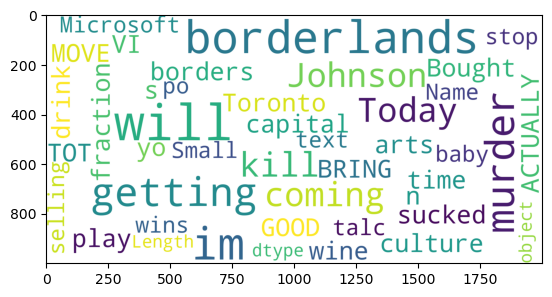

In [19]:
wordcloud=WordCloud(background_color='white',stopwords=stopwords,max_words=300,max_font_size=40,scale=5).generate(str(df['text']))
plt.imshow(wordcloud)

## WordCloud

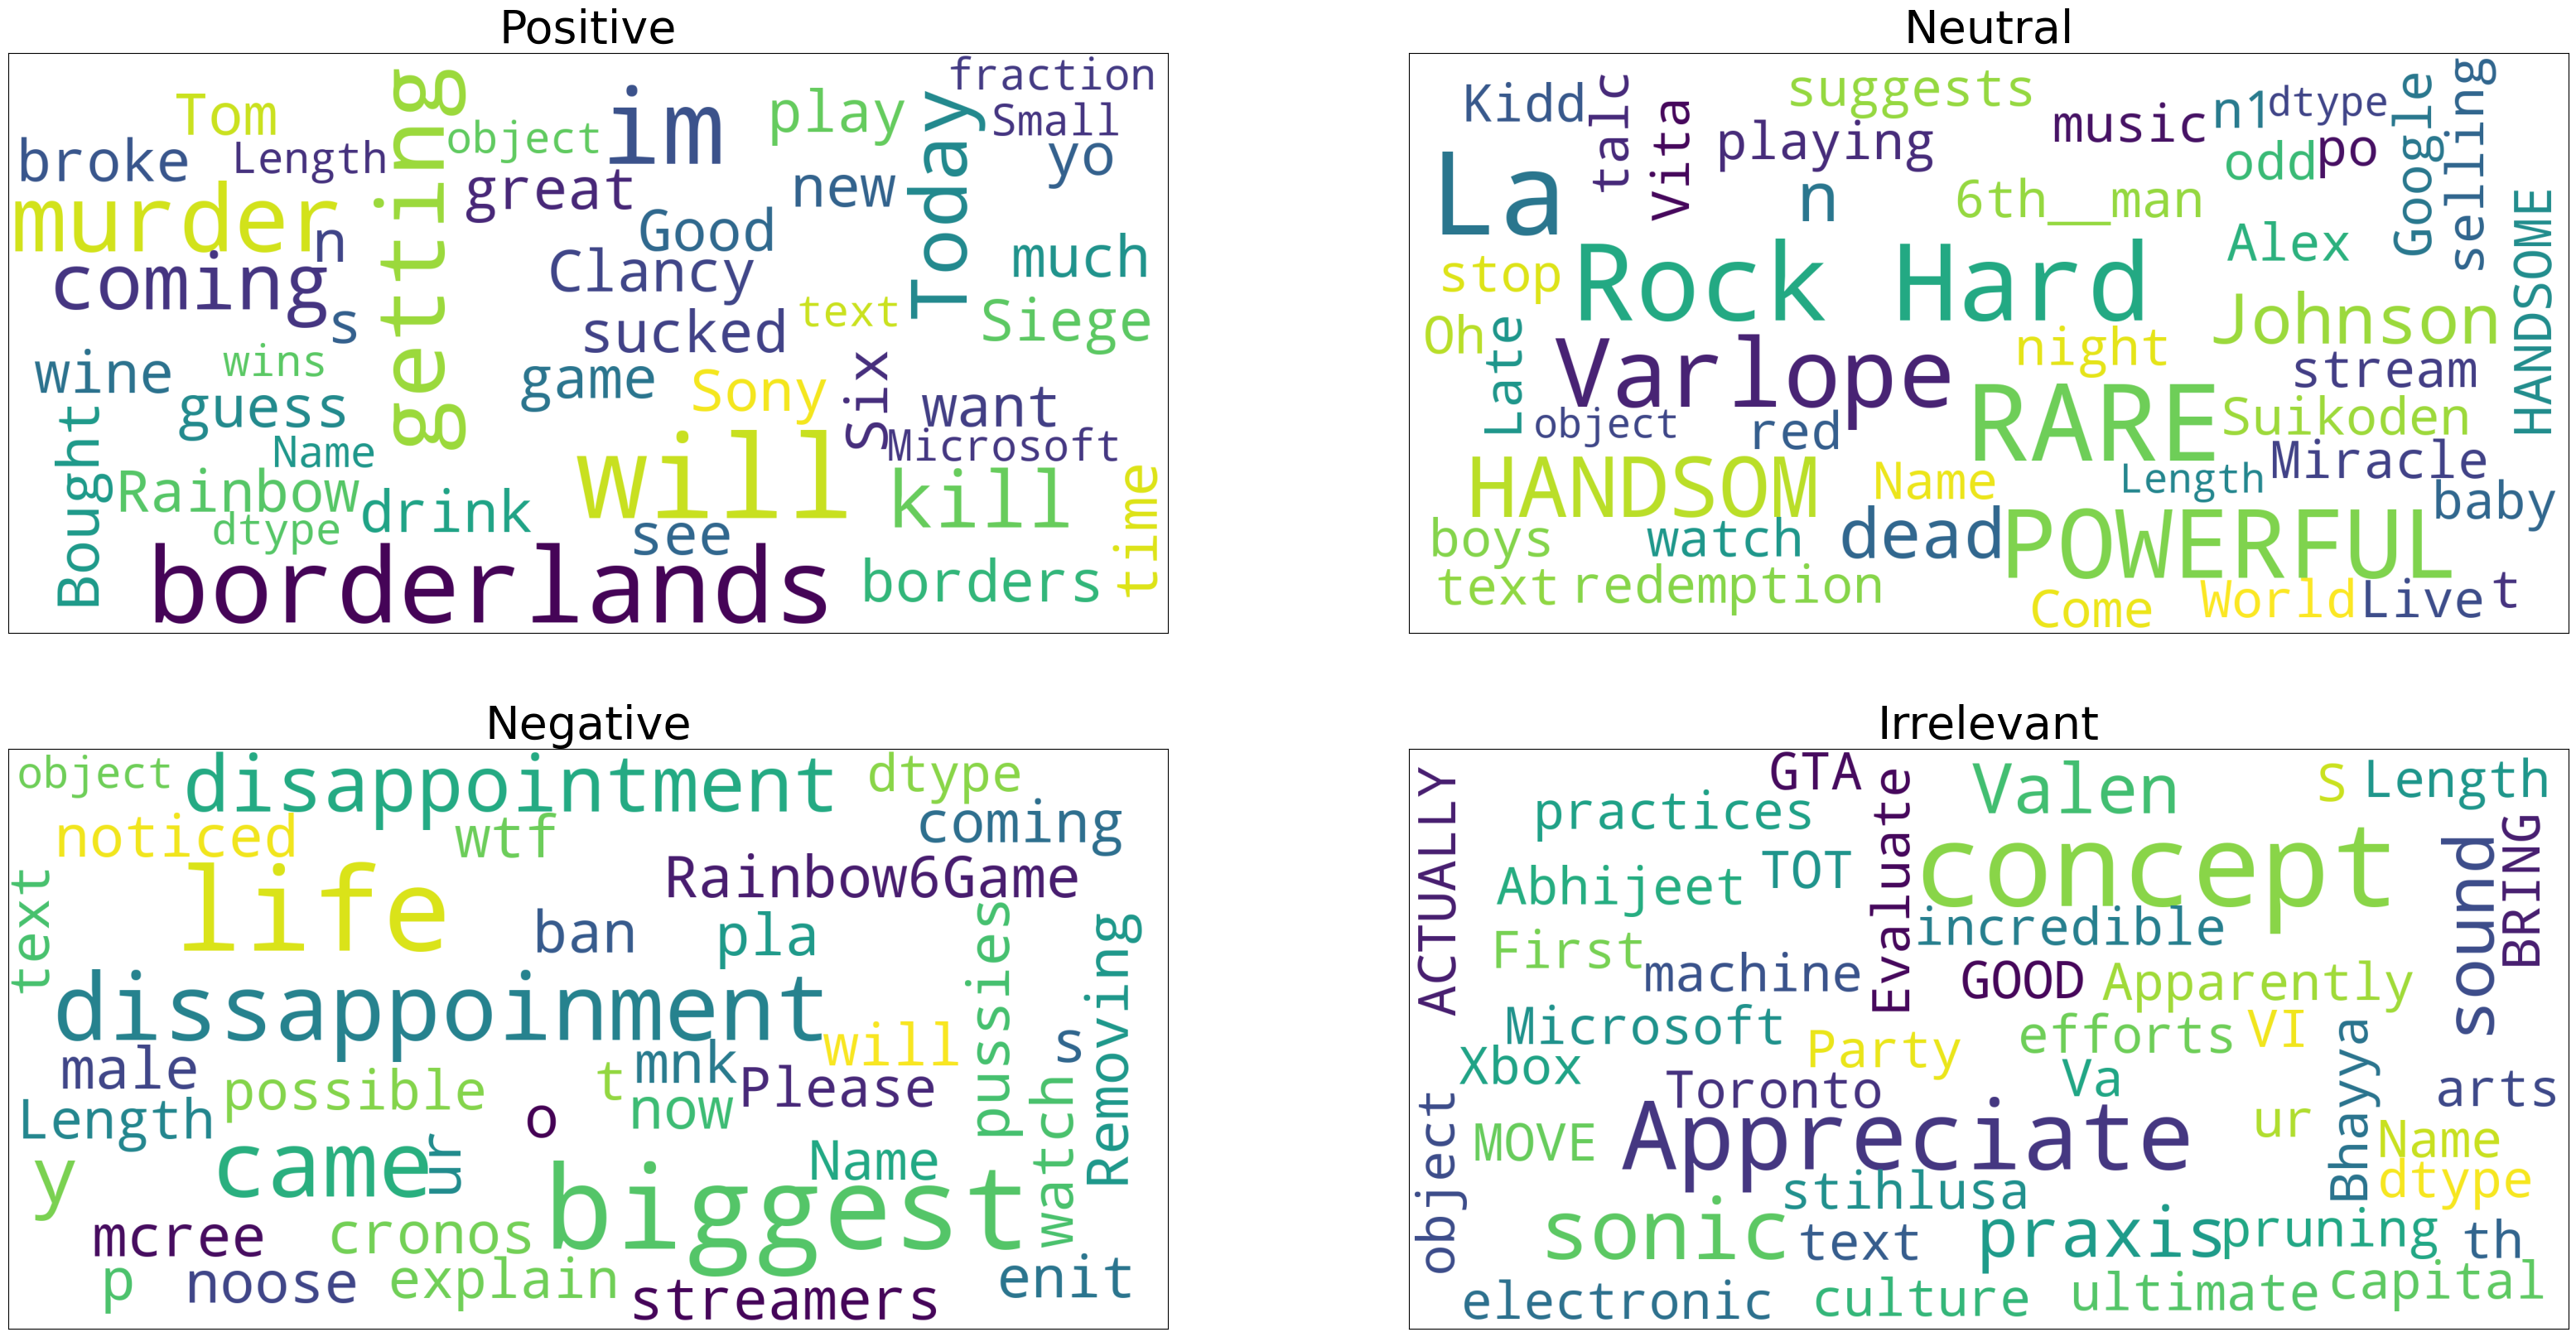

<Figure size 640x480 with 0 Axes>

In [20]:

# plot 2x2 grid word cloud for each sentiment
plt.figure(figsize=(40,20))

for index, col in enumerate(df['sentiment'].unique()):
    plt.subplot(2,2, index+1)
    # print(col)
    df1 = df[df['sentiment']==col]
    data = df1['text']
    wordcloud = WordCloud(background_color='white', stopwords=stopwords, max_words=500, max_font_size=40, scale=5).generate(str(data))
    # fig = plt.figure(figsize=(15,15))
    # plt.axis('off')
    # disable ticks
    plt.xticks([])
    plt.yticks([])
    plt.imshow(wordcloud)
    plt.title(col, fontsize=40)
    
plt.show()
plt.tight_layout()


### Data Cleaning

#### Convert to lower case

In [21]:
df['text'] = df['text'].apply(lambda x: x.lower())

#### Remove @ mentions and hyperlinks

In [22]:
df['text'] = df['text'].apply(lambda x: ps.remove_urls(x))
df['text'] = df['text'].apply(lambda x: ps.remove_html_tags(x))

#### Remove Punctations & Emojies & Numbers

In [23]:

df['text'] = df['text'].apply(lambda x: ps.remove_special_chars(x))
df['text'] = df['text'].apply(lambda x: ps.remove_rt(x))

## Model Building

In [24]:
# train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['text'], df['sentiment'], test_size=0.2, random_state=42)

In [25]:
X_train.shape, X_test.shape

((59717,), (14930,))

#### Random Forest

In [26]:
# model building
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

clf = Pipeline([('tfidf', TfidfVectorizer()), ('rfc', RandomForestClassifier( n_jobs=-1))])
clf.fit(X_train, y_train)


Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('rfc', RandomForestClassifier(n_jobs=-1))])

## Performance evaluation

In [27]:

# evaluation
from sklearn.metrics import accuracy_score

predictions = clf.predict(X_test)
print(accuracy_score(y_test, predictions))

0.9120562625586068


In [28]:

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy:.2f}')

# Display classification report
print('Classification Report:')
print(classification_report(y_test, predictions))


Accuracy: 0.91
Classification Report:
              precision    recall  f1-score   support

  Irrelevant       0.97      0.85      0.91      2616
    Negative       0.91      0.94      0.93      4552
     Neutral       0.90      0.90      0.90      3679
    Positive       0.88      0.93      0.91      4083

    accuracy                           0.91     14930
   macro avg       0.92      0.91      0.91     14930
weighted avg       0.91      0.91      0.91     14930



In [29]:

# Display confusion matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test, predictions))


Confusion Matrix:
[[2220  117  103  176]
 [  19 4278  118  137]
 [  19  168 3309  183]
 [  21  119  133 3810]]


## Testing

In [32]:
clf.predict(["Hello, I am happy"])

array(['Positive'], dtype=object)

In [35]:
clf.predict(["She is disappointed with you"])

array(['Negative'], dtype=object)

In [36]:
clf.predict(["Only listed students will join the particular group."])

array(['Neutral'], dtype=object)

In [40]:
clf.predict(["i hate brown people"])

array(['Irrelevant'], dtype=object)

## Save Model 

In [ ]:
# save model
import pickle

pickle.dump(clf, open('twitter_sentiment.pkl', 'wb'))